Streaming output truncated to the last 5000 lines.
geometry_251 = psi4.geometry("""

0 1
no_com
no_reorient
O1    0.00000    0.00000    0.00000
C1    -0.18923    0.84171    0.86495
C2    0.96812    1.38841    1.64288
C3    -1.57836    1.32603    1.14647
H1    1.03349    2.48631    1.49265
H2    0.82576    1.17534    2.72296
H3    1.92064    0.92411    1.30898
H4    -2.31283    0.82041    0.48370
H5    -1.63426    2.42096    0.97259
H6    -1.84199    1.11000    2.20291
O2    0.07691    0.41930    2.15877
H7    0.11186    0.60985    3.13982
H8    0.04196    1.41682    2.21992
""")

geometry_252 = psi4.geometry("""

0 1
no_com
no_reorient
O1    0.00000    0.00000    0.00000
C1    -0.18923    0.84171    0.86495
C2    0.96812    1.38841    1.64288
C3    -1.57836    1.32603    1.14647
H1    1.03349    2.48631    1.49265
H2    0.82576    1.17534    2.72296
H3    1.92064    0.92411    1.30898
H4    -2.31283    0.82041    0.48370
H5    -1.63426    2.42096    0.97259
H6    -1.84199    1.11000   

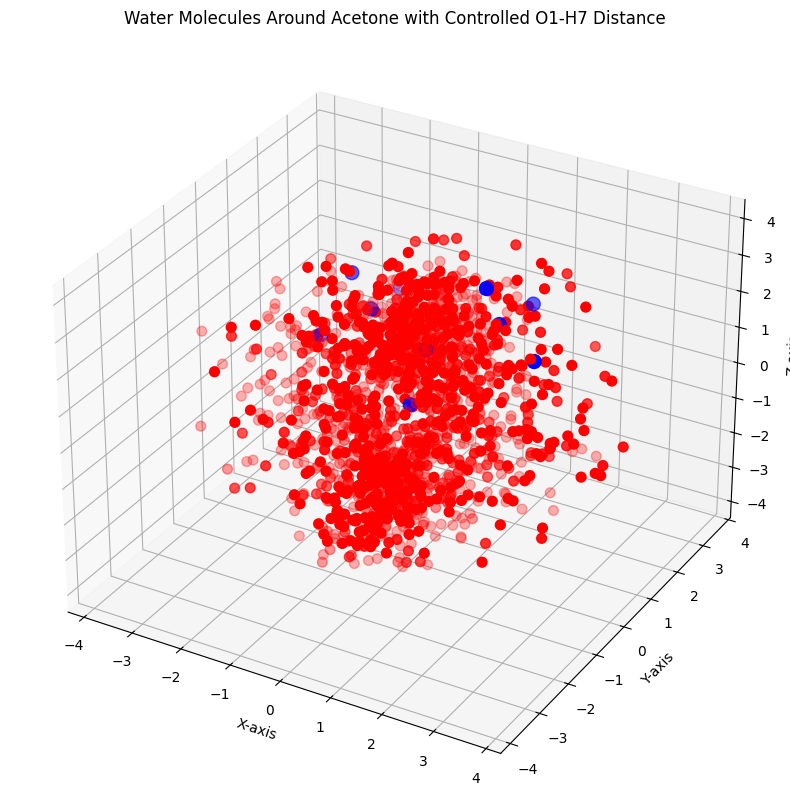

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

#acetone coordinates
acetone = {
    'O1': np.array([0.32008, -0.61272, -1.49255]),  # Acetone oxygen
    'C1': np.array([0.13085, 0.22899, -0.62760]),   # Acetone carbonyl carbon
    'C2': np.array([1.28820, 0.77569, 0.15033]),    # Acetone carbon 2
    'C3': np.array([-1.25828, 0.71331, -0.34608]),  # Acetone carbon 3
    'H1': np.array([1.35357, 1.87359, 0.00010]),    # Acetone hydrogen 1
    'H2': np.array([1.14584, 0.56262, 1.23041]),    # Acetone hydrogen 2
    'H3': np.array([2.24072, 0.31139, -0.18357]),   # Acetone hydrogen 3
    'H4': np.array([-1.99275, 0.20769, -1.00885]),  # Acetone hydrogen 4
    'H5': np.array([-1.31418, 1.80824, -0.51996]),  # Acetone hydrogen 5
    'H6': np.array([-1.52191, 0.49728, 0.71036]),   # Acetone hydrogen 6
}

#center the acetone molecule so that O1 is at the origin [0, 0, 0]
center = acetone['O1']  # Current coordinates of O1
acetone_centered = {atom: coords - center for atom, coords in acetone.items()}
print("o1 coordinate centered", acetone_centered)

#water coordinates
water= {'O2': np.array([-1.54259, -2.42785, -2.25238]), # Water oxygen
        'H7': np.array([-0.57259, -2.42785, -2.25238]), # Water hydrogen 1
        'H8': np.array([-1.86592, -3.24867, -1.84913])  # Water hydrogen 2
}

#move the water molecule relative to the centered oxygen on the acetone
water_centered = {atom: coords - acetone['O1'] for atom, coords in water.items()}
print("new water coordinates", water_centered)


#determine the number of water molecules and the distance from the oxygen on the acetone
num_water_molecules = 500  # Adjust this for more/less water molecules
distance_range = (2.0, 4.0)  # Range of distances from O1 to H7
water_molecules = []

#sample water molecules around acetone
for _ in range(num_water_molecules):
    # Randomly sample distance, theta, and phi for H7
    distance = np.random.uniform(*distance_range)
    theta = np.random.uniform(0, np.pi)
    phi = np.random.uniform(0, 2 * np.pi)

    #spherical to cartesian coordinates for H7
    x = distance * np.sin(theta) * np.cos(phi)
    y = distance * np.sin(theta) * np.sin(phi)
    z = distance * np.cos(theta)
    h7_position = np.array([x, y, z])  # H7 position relative to O1

    #O2 position relative to H7
    o2_direction = -h7_position / np.linalg.norm(h7_position)  # Unit vector towards O1
    o2_position = h7_position + 1.0 * o2_direction  # O2 at fixed bond length (1.0 Å)

    #compute H8 position relative to O2
    rotation = R.from_euler('xyz', [104.5, 0, 0], degrees=True)  # Tetrahedral angle
    h8_relative = rotation.apply(o2_direction)
    h8_position = o2_position + h8_relative

    #store the water molecule configuration
    rotated_water = {
        'O2': o2_position,
        'H7': h7_position,
        'H8': h8_position,
    }
    water_molecules.append(rotated_water)


#print out the geometries for psi4
def format_psi4_geometry(acetone_coords, water_coords, index):
    geometry = f"geometry_{index} = psi4.geometry(\"\"\"\n\n"
    geometry += "0 1\n"  # Charge and multiplicity
    geometry += "no_com\n"
    geometry += "no_reorient\n"
    #add acetone coordinates
    for atom, coords in acetone_coords.items():
        geometry += f"{atom}    {coords[0]:.5f}    {coords[1]:.5f}    {coords[2]:.5f}\n"
    #add water coordinates
    for atom, coords in water_coords.items():
        geometry += f"{atom}    {coords[0]:.5f}    {coords[1]:.5f}    {coords[2]:.5f}\n"
    geometry += "\"\"\")\n"
    return geometry





#plotting
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

#plot the acetone molecule
acetone_coords = np.array(list(acetone_centered.values()))
ax.scatter(
    acetone_coords[:, 0], acetone_coords[:, 1], acetone_coords[:, 2],
    color="blue", label="Acetone Atoms", s=100
)

#plot all water molecules
for i, water in enumerate(water_molecules):
    water_coords = np.array(list(water.values()))
    ax.scatter(
        water_coords[:, 0], water_coords[:, 1], water_coords[:, 2],
        color="red", label=f"Water {i + 1}" if i == 0 else "", s=50
    )

#labels
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Water Molecules Around Acetone with Controlled O1-H7 Distance")

#generate and store all geometries
geometries = []
for i, water in enumerate(water_molecules, start=1):
    psi4_geometry = format_psi4_geometry(acetone_centered, water, i)
    geometries.append(psi4_geometry)

#print all geometries
for geometry in geometries:
    print(geometry)
